In [2]:
%load_ext autoreload
%autoreload 2
import os
import glob
import h5py
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import torch
import torch.nn as nn
from m3util.viz.style import set_style
from m3util.viz.printing import printer
from m3util.viz.layout import layout_fig
from dl_utils.utils.utils import list_to_dict, find_last_epoch_file, sort_tasks_by_size
from dl_utils.analysis.confusion_matrix import confusion_matrix, plot_cm, show_multiple_cm
from dl_utils.packed_functions import viz_4confusion_matrix
printing = printer(basepath = '../../../figures/ConfusionMatrix/', fileformats=['png', 'svg', 'tif'], dpi=600)
set_style("printing")

symmetry_classes = ['p1', 'p2', 'pm', 'pg', 'cm', 'pmm', 'pmg', 'pgg', 'cmm', 'p4', 'p4m', 'p4g', 'p3', 'p3m1', 'p31m', 'p6', 'p6m']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn


### Compare different dataset size with ResNet50 results

Scale of dataset matters when utilize DL models to understand physical information.

In [ ]:
### save single plots for presentation
titles = ['10k train', '100k train', '10m train',
          '10k valid', '100k valid', '10m valid',
          '10k noise', '100k noise', '10m noise',  
          '10k atoms', '100k atoms', '10m atoms']


cm_files = [ '../../../results/ResNet50/09022024-resnet50-dataset_v5_size-10k-imagenet_train_cm.npy',
            '../../../results/ResNet50/09082024-resnet50-dataset_v5_size-100k-imagenet_train_cm.npy',
            '../../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-imagenet_train_cm.npy',

            '../../../results/ResNet50/09022024-resnet50-dataset_v5_size-10k-imagenet_valid_cm.npy',    
            '../../../results/ResNet50/09082024-resnet50-dataset_v5_size-100k-imagenet_valid_cm.npy',
            '../../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-imagenet_valid_cm.npy',

            '../../../results/ResNet50/09022024-resnet50-dataset_v5_size-10k-noise_cross_validation_cm.npy',
            '../../../results/ResNet50/09082024-resnet50-dataset_v5_size-100k-noise_cross_validation_cm.npy',
            '../../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-noise_cross_validation_cm.npy',

            '../../../results/ResNet50/09022024-resnet50-dataset_v5_size-10k-atom_cross_validation_cm.npy',
            '../../../results/ResNet50/09082024-resnet50-dataset_v5_size-100k-atom_cross_validation_cm.npy',
            '../../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-atom_cross_validation_cm.npy',
            ]
for i, (cm_file, title) in enumerate(zip(cm_files, titles)):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    cm = np.load(cm_file)
    plot_cm(cm, symmetry_classes, ax=ax, font_size=5)
    printing.savefig(fig, title)
    plt.show()

../../../figures/ConfusionMatrix/cm-compare_ds_size.png
../../../figures/ConfusionMatrix/cm-compare_ds_size.svg


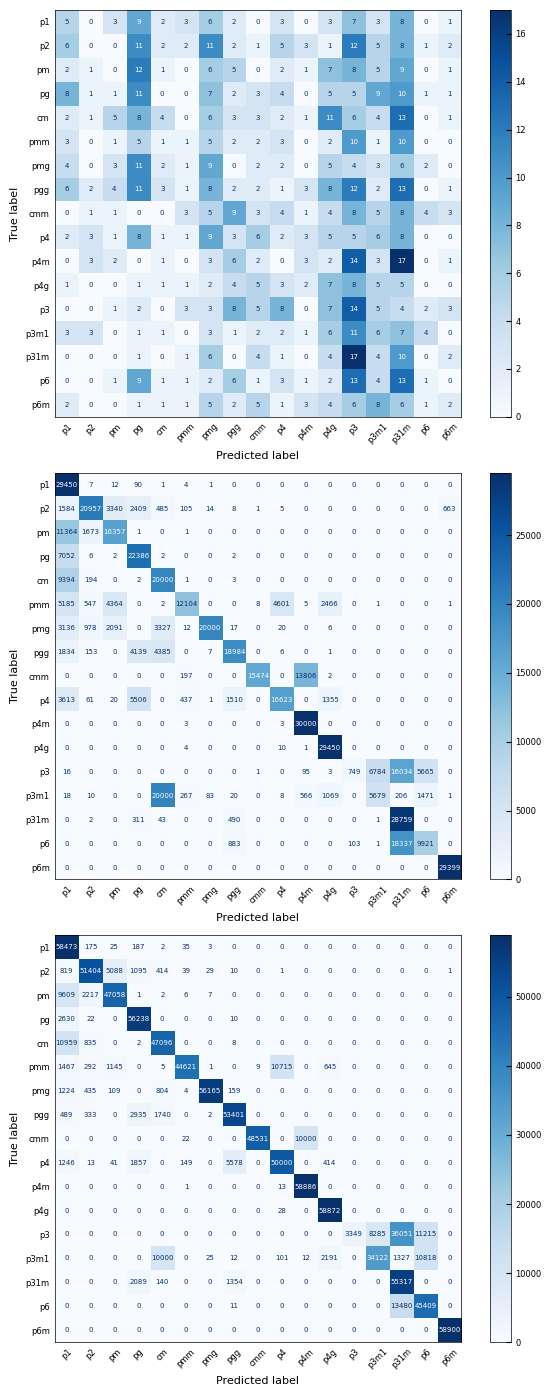

In [27]:
cm_files = ['../../../results/ResNet50/09052024-resnet50-dataset_v5_size-1k-atom_cross_validation_cm.npy',
            '../../../results/ResNet50/09022024-resnet50-dataset_v5_size-500k-atom_cross_validation_cm.npy',
            '../../../results/ResNet50/09052024-resnet50-dataset_v5_size-2m-atom_cross_validation_cm.npy',]
fig, axes = layout_fig(len(cm_files), 1, figsize=(6, 14), layout='tight')
for i, cm_file in enumerate(cm_files):
    cm = np.load(cm_file)
    plot_cm(cm, symmetry_classes, ax=axes[i], font_size=5)
    
printing.savefig(fig, 'cm-compare_ds_size')
plt.show()

### Compare well-trained models with 10m dataset

Compare different model structures

../../../figures/ConfusionMatrix/cm-compare_models.png
../../../figures/ConfusionMatrix/cm-compare_models.svg


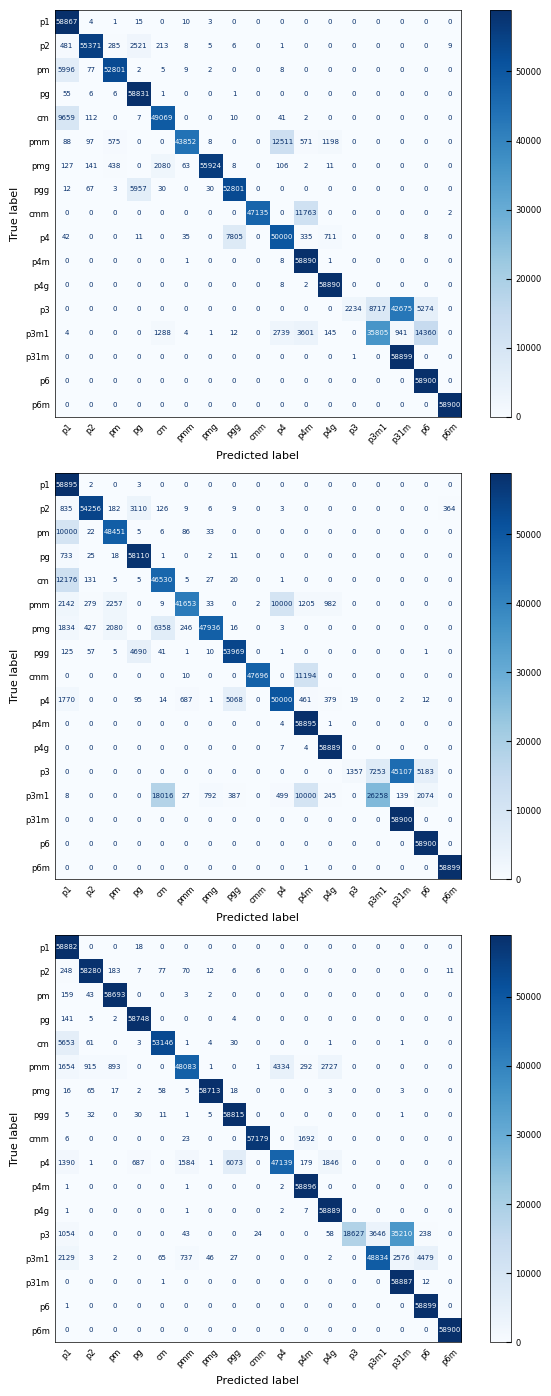

In [28]:
cm_files = ['../../../results/ResNet50/09112024-resnet50-dataset_v5_size-10m-atom_cross_validation_cm.npy',
            '../../../results/FPN/09282024-FPN-dataset_v5_size-10m-atom_cross_validation_cm.npy',
            '../../../results/XCiT/09302024-XCiT-dataset_v5_size-10m-atom_cross_validation_cm.npy',]
fig, axes = layout_fig(len(cm_files), 1, figsize=(6, 14), layout='tight')
for i, cm_file in enumerate(cm_files):
    cm = np.load(cm_file)
    plot_cm(cm, symmetry_classes, ax=axes[i], font_size=5)
    
printing.savefig(fig, 'cm-compare_models')
plt.show()